Ce TP a été réalisé par :
 - Angéline MARC
 - Thomas Huguenel

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utilsfunction  import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
data = np.loadtxt('Wave.txt')
features = data[:, :-1]
label = data[:, -1]

#normalize the data
features_norm = StandardScaler().fit_transform(features)

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(features_norm, label, test_size=0.5, random_state=42, stratify=label)


In [80]:
y_train_norm_copy = y_train_norm.copy()
y_train_lab = etiquetage(y_train_norm_copy, 0.80)
score_norm = pertinence(X_train_norm, y_train_lab)
print(score_norm)


[1.91129438e-11 1.80136375e-07 5.15403265e-07 8.66170757e-07
 1.51937625e-06 1.67703700e-06 1.83002963e-06 1.53694942e-06
 1.37247100e-06 1.22964849e-06 1.35722158e-06 1.27102718e-06
 1.44182298e-06 1.40245454e-06 1.70267890e-06 1.70121644e-06
 1.42300596e-06 9.43580000e-07 4.90819160e-07 1.80088212e-07
 4.09851707e-11 1.10520743e-09 3.47729819e-09 3.01262059e-11
 1.67810677e-08 2.53012333e-09 1.79093360e-09 5.19747186e-11
 5.64793143e-09 1.12188637e-09 1.78235006e-09 2.76071955e-10
 1.08349720e-09 7.93431301e-09 8.87885070e-09 3.74568987e-09
 5.79044478e-10 8.48041565e-09 2.70512601e-10 3.60728207e-09]


## Histogramme

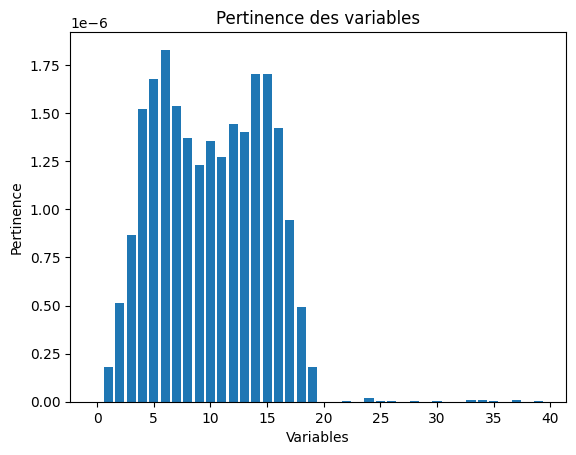

In [81]:
plt.bar(range(len(score_norm)), score_norm)
plt.xlabel('Variables')
plt.ylabel('Pertinence')
plt.title('Pertinence des variables')
plt.show()

## Courbe d'efficacité

In [82]:
acc_list = []

In [83]:
n_features, acc = plot_efficacite_courbe(X_train_norm, X_test_norm, y_train_norm, y_test_norm, score_norm, pert=0)
acc_list.append(acc)

## Sur les données non normalisées

In [84]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=42, stratify=label)
y_train_copy = y_train.copy()
y_train_lab_pas_norm = etiquetage(y_train_copy, 0.8)
score = pertinence(X_train, y_train_lab_pas_norm)

In [85]:
n_features, acc = plot_efficacite_courbe(X_train, X_test, y_train, y_test, score, pert=0)
acc_list.append(acc)

## Variable non pertinentes

In [86]:
n_features, acc = plot_efficacite_courbe(X_train_norm, X_test_norm, y_train_norm, y_test_norm, score_norm, pert=1)
acc_list.append(acc)

## Sans selection de variable

In [87]:
n_features, acc = plot_efficacite_courbe(X_train_norm, X_test_norm, y_train_norm, y_test_norm, score_norm, pert=2)
acc_list.append(acc)

In [88]:
n_features_list = [n_features, n_features, n_features, n_features]

## Plot des courbes

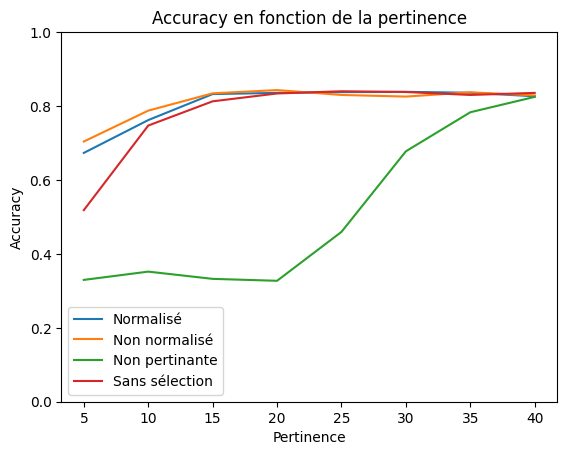

In [89]:
#plot des accuracy
plt.figure()
for i in range(4):
    plt.plot(n_features_list[i], acc_list[i])
plt.xlabel('Pertinence')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction de la pertinence')
plt.legend(['Normalisé', 'Non normalisé', 'Non pertinante', 'Sans sélection'])
plt.ylim(0, 1)
plt.show()

## Courbe de performance en fonction du % de données labélisées

[0.8416, 0.84, 0.8384, 0.8344, 0.836, 0.8404, 0.8288, 0.8424, 0.8268]


c:\Users\runhi\Desktop\TAA_TP3\utilsfunction.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  


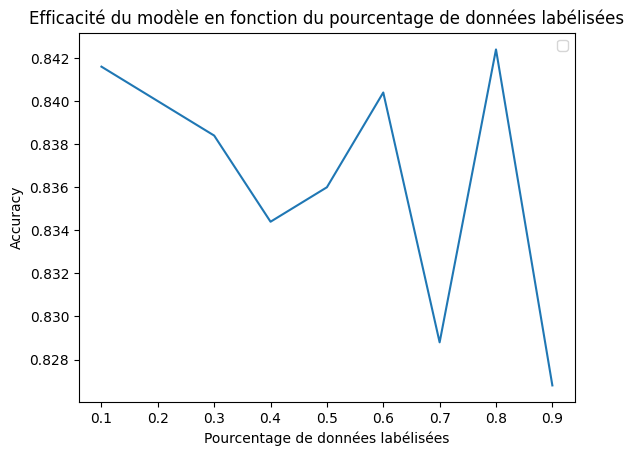

In [90]:
plot_efficacite_courbe_2( [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9], step=20)